### **CONTENT LIST** 

1. [Importing the data](#1) <br/>
2. [Understanding the data](#2)  <br/>
3. [Cleaning Data](#3)         <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Dropping the Duplicates](#x)   <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Correcting the shifts](#a)   <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Rating](#b)      <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Reviews](#c)   <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Size](#d)   <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Installs](#e)   <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Price](#f)   <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Category](#g)  <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Last Updated](#h)<br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Type](#i)<br/>


4. [Visualising the Data](#4) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Content Rating](#j)<br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Free and Paid Apps](#k)<br/>
5. [Exploratory Data Analysis](#5)  <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [General Correlation](#a1)   <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Correlation with Type](#b1)   <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Category and Type](#c1)   <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Category and Reviews](#d1)   <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Category and Installs](#e1)      <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Category and Price](#f1)   <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Type and Installs](#g1)   <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Word Count in Reviews](#h1)   <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Mean Sentiment for Each App](#i1)   <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Comparison of two dataframes (Apps and Reviews)](#j1)   <br/>


6. [Joining the Data (Apps and Reviews)](#6)
7. [Further Analysis](#7) <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Reviews of Paid Apps and Review Word Counts](#a2)   <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Reviews of Free Apps and Review Word Counts](#d2)   <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Highest revenued apps and reviews](#e2)   <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Highest Revenued App Categories and Review Word Counts](#b2)   <br/>
&nbsp;&nbsp;&nbsp;&nbsp;  [Most Successfull apps, types and categories](#c2)   <br/>



<a id="1"></a>
# 1. Importing The Data


In [2]:
google_data_link="googleplaystore.csv"
google_reviews_link="googleplaystore_user_reviews.csv"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

In [4]:
google_data=pd.read_csv(google_data_link)
google_reviews=pd.read_csv(google_reviews_link)

<a id="2"></a>
# 2. Understanding The Data
Firstly let's get to know data.  While I was analyzing the data, I used Pandas library.  <br/>


In [5]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
google_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


we will use first 9 columns, in there there are one null in Type and Content Rating, a lot of null in Rating

In [8]:
google_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
google_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


<a id="3"></a>
# 3. Cleaning The Data

In [10]:
# indexing
google_data['index']=range(1,10842)

In [11]:
# to turn empty cells to np.nan
google_data = google_data.replace('',np.nan)

<a id="a"></a>
## Correcting the shifts

In [12]:
# I find a data line is shifted 1 cell left
google_data.loc[google_data.Category==('1.9')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,index
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,10473


In [13]:
#it has index 10473, it means its on row 10472
for i in range(2,13): google_data.iloc[10472,-i]=google_data.iloc[10472,-i-1]

In [14]:
google_data.iloc[10472,1]='LIFESTYLE'

<a id="x"> <a/>
## Dropping the duplicates


#### how many unique apps in the dataset

In [15]:
google_data.App.unique().size

9660


#### how many duplicates in the dataset

In [16]:
google_data.App.duplicated().sum()

1181

#### creating a unique dataset

In [17]:
google_unique=google_data.drop_duplicates(subset='App',keep="first",inplace=False)

<a id="b"></a>
## Rating 

In [18]:
google_unique.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [19]:
google_unique.Rating.dropna().size

8197

##### Data type of Rating is object. it has to be numeric to analyse

In [20]:
google_unique['Rating']=pd.to_numeric(google_unique['Rating'],errors='coerce')

C:\Users\user\AppData\Local\Temp\ipykernel_8240\20781107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_unique['Rating']=pd.to_numeric(google_unique['Rating'],errors='coerce')


In [21]:
google_unique.Rating.dtypes

dtype('float64')

<a id="c"></a>
## Reviews 

In [22]:
google_unique['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [23]:
google_unique['Reviews']=pd.to_numeric(google_unique['Reviews'],errors='coerce')
google_unique.groupby("Type").Reviews.mean()

C:\Users\user\AppData\Local\Temp\ipykernel_8240\214557520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_unique['Reviews']=pd.to_numeric(google_unique['Reviews'],errors='coerce')


Type
Free    234243.690666
Paid      8724.887566
Name: Reviews, dtype: float64

<a id="d"></a>
## Size

In [24]:
google_unique.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [25]:
google_unique['Size']=google_unique['Size'].replace("Varies with device",np.nan)
google_unique['Size']=google_unique['Size'].str.replace(".",'')
google_unique['Size']=google_unique['Size'].str.replace("M",'000')
google_unique['Size']=google_unique['Size'].str.replace("k",'')


C:\Users\user\AppData\Local\Temp\ipykernel_8240\2225645649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_unique['Size']=google_unique['Size'].replace("Varies with device",np.nan)
C:\Users\user\AppData\Local\Temp\ipykernel_8240\2225645649.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  google_unique['Size']=google_unique['Size'].str.replace(".",'')
C:\Users\user\AppData\Local\Temp\ipykernel_8240\2225645649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [26]:
# now all data is KB 
google_unique.Size.head()

0    19000
1    14000
2    87000
3    25000
4    28000
Name: Size, dtype: object

<a id="e"></a>
## Installs

In [27]:
google_unique.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [28]:
# to use installs we should manipulate the data,
# to delete last '+' and delete the comma separation for integers.
google_unique['Installsx'] = google_unique['Installs'].str.replace('+', '')
google_unique['Installsx'] = google_unique['Installsx'].str.replace(',', '')
google_unique['Installsx']=google_unique['Installsx'].astype(float)


C:\Users\user\AppData\Local\Temp\ipykernel_8240\1685603449.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  google_unique['Installsx'] = google_unique['Installs'].str.replace('+', '')
C:\Users\user\AppData\Local\Temp\ipykernel_8240\1685603449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_unique['Installsx'] = google_unique['Installs'].str.replace('+', '')
C:\Users\user\AppData\Local\Temp\ipykernel_8240\1685603449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [29]:
google_unique.Installsx.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installsx, dtype: float64

<a id="f"></a>
## Price

In [30]:
google_unique[google_unique['Type']=='Paid'].head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,index,Installsx
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,68000,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,235,100000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39000,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,236,100000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,NaN,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,428,100000.0
476,"Moco+ - Chat, Meet People",DATING,4.2,1545.0,NaN,"10,000+",Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,477,10000.0
477,Calculator,DATING,2.6,57.0,62000,"1,000+",Paid,$6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,478,1000.0


In [31]:
google_unique['Price']=google_unique['Price'].str.replace('$','').astype(float)

C:\Users\user\AppData\Local\Temp\ipykernel_8240\1508773381.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  google_unique['Price']=google_unique['Price'].str.replace('$','').astype(float)
C:\Users\user\AppData\Local\Temp\ipykernel_8240\1508773381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_unique['Price']=google_unique['Price'].str.replace('$','').astype(float)


In [32]:
google_unique[google_unique['Type']=='Paid'].head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,index,Installsx
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,68000,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,235,100000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39000,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,236,100000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,NaN,"100,000+",Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,428,100000.0
476,"Moco+ - Chat, Meet People",DATING,4.2,1545.0,NaN,"10,000+",Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,477,10000.0
477,Calculator,DATING,2.6,57.0,62000,"1,000+",Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,478,1000.0


<a id="g"></a>
## Category

In [33]:
google_unique.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

<a id="h"></a>
## Last Updated

In [34]:
google_unique['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [35]:
google_unique['Last Updated'] = pd.to_datetime(google_unique['Last Updated'])
google_unique['Last Updated']

C:\Users\user\AppData\Local\Temp\ipykernel_8240\2077005343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_unique['Last Updated'] = pd.to_datetime(google_unique['Last Updated'])


0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9660, dtype: datetime64[ns]

<a id="i"></a>
## Type

In [36]:
google_unique.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

type is two category column so we can turn it to boolean to analyse easyly

In [37]:
google_unique["Typex"]=google_unique["Type"].replace({"Free":0,"Paid":1})

C:\Users\user\AppData\Local\Temp\ipykernel_8240\4004937327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_unique["Typex"]=google_unique["Type"].replace({"Free":0,"Paid":1})


<a id="4" > <a/>
# 4. Visualising the Data

<a id="j"></a>
## Content Rating

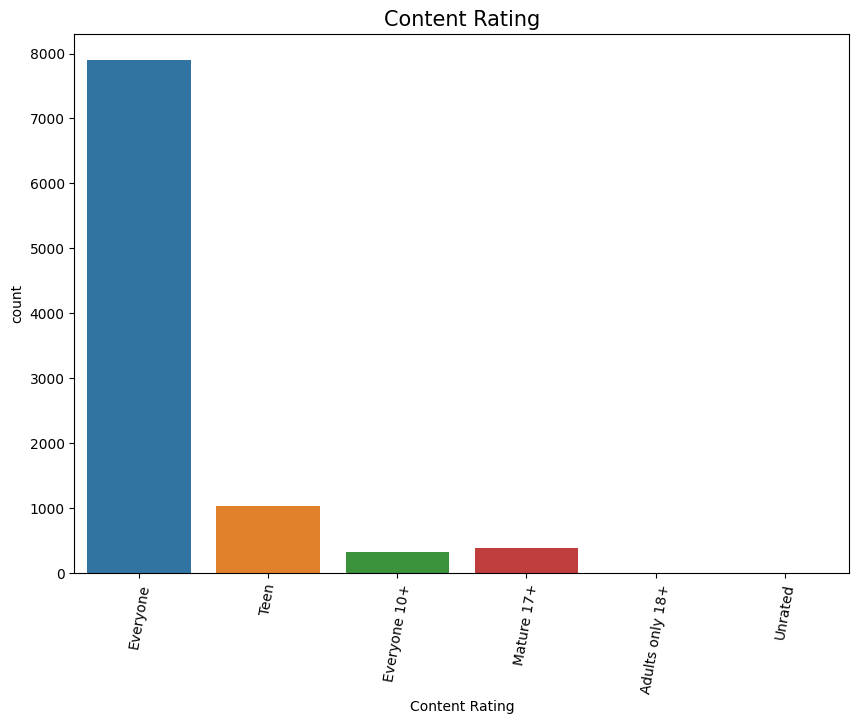

In [38]:
plt.figure(figsize=(10,7))
sns.countplot(data=google_unique, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating',color = 'black',fontsize=15)
plt.show()

<a id="k"></a>
## Paid and Free Apps 

C:\Users\user\AppData\Local\Temp\ipykernel_8240\3655924679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_unique["to_sum"]=google_unique.Type.apply([lambda x: 1])


<Axes: title={'center': 'Paid and Free Apps'}>

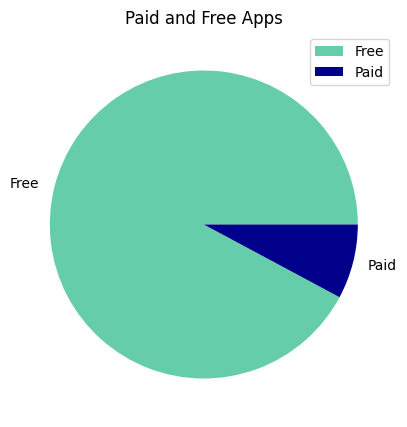

In [39]:
google_unique["to_sum"]=google_unique.Type.apply([lambda x: 1])
google_installs1=google_unique[["Type","to_sum"]].dropna()
google_installs1.groupby(['Type']).sum().plot(kind='pie',y='to_sum',ylabel="", figsize=(5, 5),colors=['mediumaquamarine','darkblue'],title="Paid and Free Apps")

In [40]:
756/8903

0.08491519712456476

In [41]:
google_installs1.groupby(['Type']).sum()

,to_sum
Type,
Free,8903
Paid,756


<a id="5"></a>
# 5. Data Analysis

In [42]:
google_unique.describe()

,Rating,Reviews,Price,index,Installsx,Typex,to_sum
count,8197.000000,9.660000e+03,9660.000000,9660.000000,9.660000e+03,9659.000000,9660.0
mean,4.172966,2.165701e+05,1.099185,5667.670393,7.776702e+06,0.078269,1.0
std,0.537179,1.831226e+06,16.851283,3102.587593,5.375555e+07,0.268608,0.0
min,1.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000,1.0
25%,4.000000,2.500000e+01,0.000000,3112.750000,1.000000e+03,0.000000,1.0
50%,4.300000,9.670000e+02,0.000000,5815.500000,1.000000e+05,0.000000,1.0
75%,4.500000,2.939400e+04,0.000000,8329.250000,1.000000e+06,0.000000,1.0
max,5.000000,7.815831e+07,400.000000,10841.000000,1.000000e+09,1.000000,1.0


C:\Users\user\AppData\Local\Temp\ipykernel_8240\1321536419.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(google_unique["Rating"], kde = False, bins=10).set_title("Histogram of Reviews")


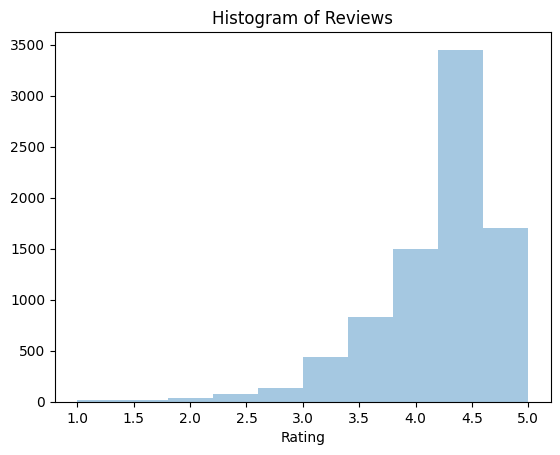

In [43]:
sns.distplot(google_unique["Rating"], kde = False, bins=10).set_title("Histogram of Reviews")
plt.show()

<a id="a1"></a>

## Correlation

In [44]:
google_unique.dropna().corr()

C:\Users\user\AppData\Local\Temp\ipykernel_8240\2990340498.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  google_unique.dropna().corr()


,Rating,Reviews,Price,index,Installsx,Typex,to_sum
Rating,1.000000,0.067587,-0.021158,-0.113314,0.047600,0.043321,NaN
Reviews,0.067587,1.000000,-0.008999,-0.095787,0.595748,-0.038849,NaN
Price,-0.021158,-0.008999,1.000000,-0.008767,-0.010567,0.223688,NaN
index,-0.113314,-0.095787,-0.008767,1.000000,-0.106011,0.033755,NaN
Installsx,0.047600,0.595748,-0.010567,-0.106011,1.000000,-0.046668,NaN
Typex,0.043321,-0.038849,0.223688,0.033755,-0.046668,1.000000,NaN
to_sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN


there is a positive correlation between installs and rating

C:\Users\user\AppData\Local\Temp\ipykernel_8240\2296025062.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(google_unique.dropna().corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


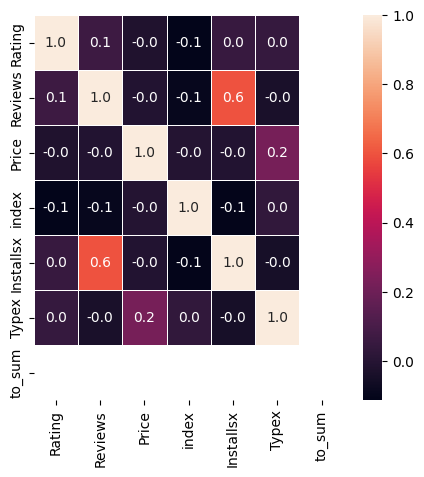

In [45]:
#correlation map
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(google_unique.dropna().corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

<a index="b1"> <a/>
## Correlation Between Groups, Type (paid or free)

In [46]:
# I like to analyse paid and free apps separetely, 
paid_apps=google_unique.loc[google_unique['Type']=='Paid']
free_apps=google_unique.loc[google_unique['Type']=='Free']

In [47]:
paid_apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,index,Installsx,Typex,to_sum
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,68000,"100,000+",Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,235,100000.0,1.0,1
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39000,"100,000+",Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,236,100000.0,1.0,1
427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,NaN,"100,000+",Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,428,100000.0,1.0,1
476,"Moco+ - Chat, Meet People",DATING,4.2,1545.0,NaN,"10,000+",Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,477,10000.0,1.0,1
477,Calculator,DATING,2.6,57.0,62000,"1,000+",Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,478,1000.0,1.0,1


In [48]:
paid_apps.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_8240\3054723642.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  paid_apps.corr()


,Rating,Reviews,Price,index,Installsx,Typex,to_sum
Rating,1.000000,0.045085,-0.112617,-0.070508,0.059903,NaN,NaN
Reviews,0.045085,1.000000,-0.014407,-0.050945,0.807545,NaN,NaN
Price,-0.112617,-0.014407,1.000000,-0.029058,-0.021525,NaN,NaN
index,-0.070508,-0.050945,-0.029058,1.000000,-0.046180,NaN,NaN
Installsx,0.059903,0.807545,-0.021525,-0.046180,1.000000,NaN,NaN
Typex,NaN,NaN,NaN,NaN,NaN,NaN,NaN
to_sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\user\AppData\Local\Temp\ipykernel_8240\3324386996.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(paid_apps.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


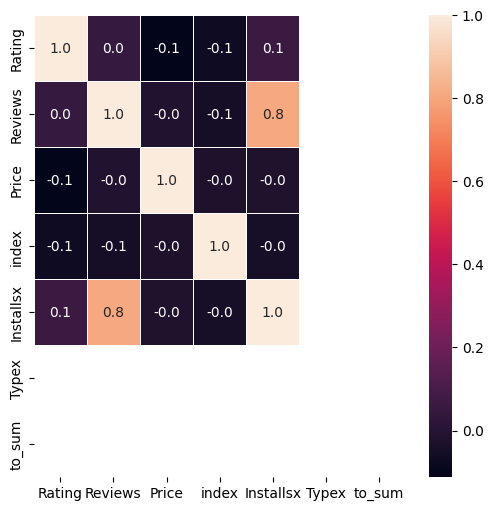

In [49]:
#correlation map
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(paid_apps.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [50]:
free_apps.dropna().corr()

C:\Users\user\AppData\Local\Temp\ipykernel_8240\740274877.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  free_apps.dropna().corr()


,Rating,Reviews,Price,index,Installsx,Typex,to_sum
Rating,1.000000,0.072092,NaN,-0.118517,0.051735,NaN,NaN
Reviews,0.072092,1.000000,NaN,-0.097377,0.595027,NaN,NaN
Price,NaN,NaN,NaN,NaN,NaN,NaN,NaN
index,-0.118517,-0.097377,NaN,1.000000,-0.107612,NaN,NaN
Installsx,0.051735,0.595027,NaN,-0.107612,1.000000,NaN,NaN
Typex,NaN,NaN,NaN,NaN,NaN,NaN,NaN
to_sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\user\AppData\Local\Temp\ipykernel_8240\468364527.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(free_apps.dropna().corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


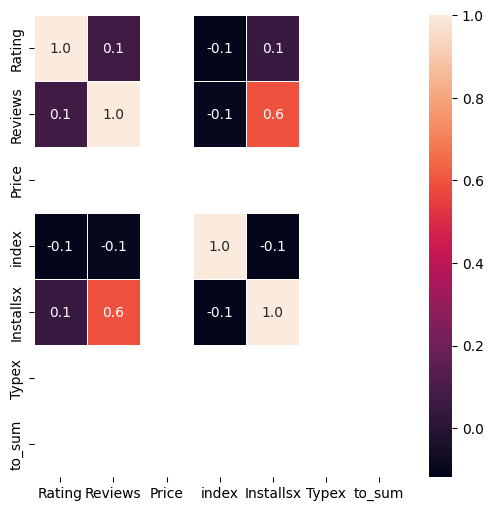

In [51]:
#correlation map
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(free_apps.dropna().corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

<a id="c1"></a>

## Category with Type

In [52]:
google_unique.Category.describe()

count       9660
unique        33
top       FAMILY
freq        1832
Name: Category, dtype: object

In [53]:
category_type=pd.crosstab(google_unique['Category'],google_unique['Type'])
category_type.head(5)

Type,Free,Paid
Category,,
ART_AND_DESIGN,61,3
AUTO_AND_VEHICLES,82,3
BEAUTY,53,0
BOOKS_AND_REFERENCE,194,28
BUSINESS,408,12


In [54]:
category_and_type = google_unique.groupby("Category").agg({"Typex": [np.size, np.sum]})
category_and_type=category_and_type.sort_values(by=[('Typex', 'size')],ascending=False)
category_and_type.head(5)

Typex       
          size    sum
Category             
FAMILY    1832  183.0
GAME       959   82.0
TOOLS      827   78.0
BUSINESS   420   12.0
MEDICAL    395   83.0

#### Paid app ratio of each category, we can see that for each category how many of the apps are paid

In [112]:
category_and_type = google_unique.dropna(subset='Type').groupby("Category").agg({"Typex": [np.mean, np.size]})
category_and_type=category_and_type.sort_values(by=[('Typex', 'mean')],ascending=False)
category_and_type.head(10)

Typex      
                         mean  size
Category                           
PERSONALIZATION      0.215426   376
MEDICAL              0.210127   395
BOOKS_AND_REFERENCE  0.126126   222
WEATHER              0.101266    79
FAMILY               0.099945  1831
TOOLS                0.094317   827
COMMUNICATION        0.085714   315
GAME                 0.085506   959
PRODUCTIVITY         0.074866   374
SPORTS               0.073846   325

In [113]:
category_and_type.columns

MultiIndex([('Typex', 'mean'),
            ('Typex', 'size')],
           )

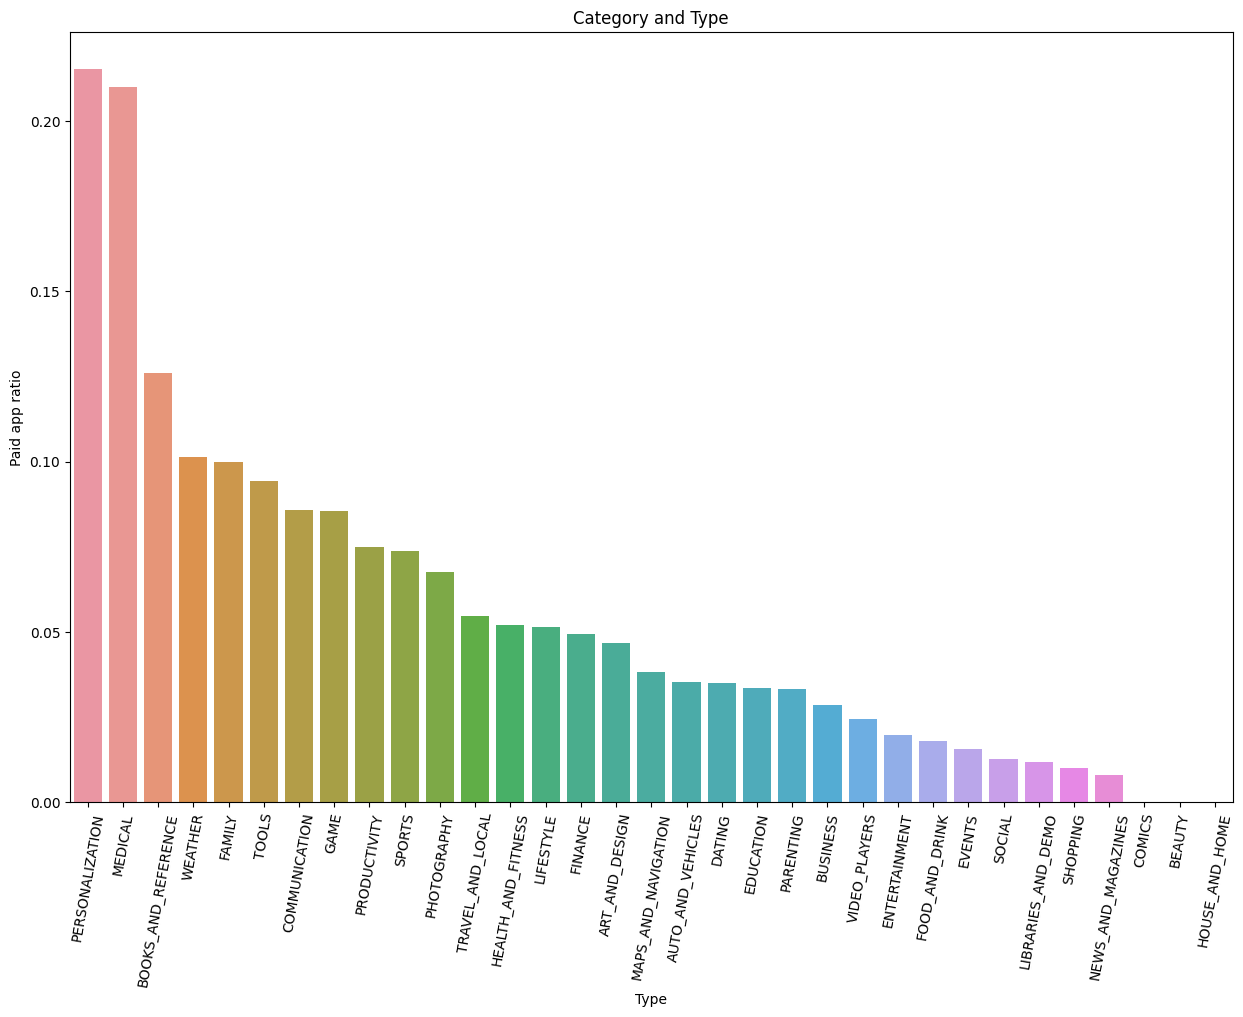

In [114]:
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=category_and_type.index, y=category_and_type[('Typex', 'mean')])
plt.xticks(rotation=80)
plt.xlabel("Type")
plt.ylabel("Paid app ratio")
plt.title("Category and Type")
plt.show()

<a id="d1"></a>
## Category and Reviews

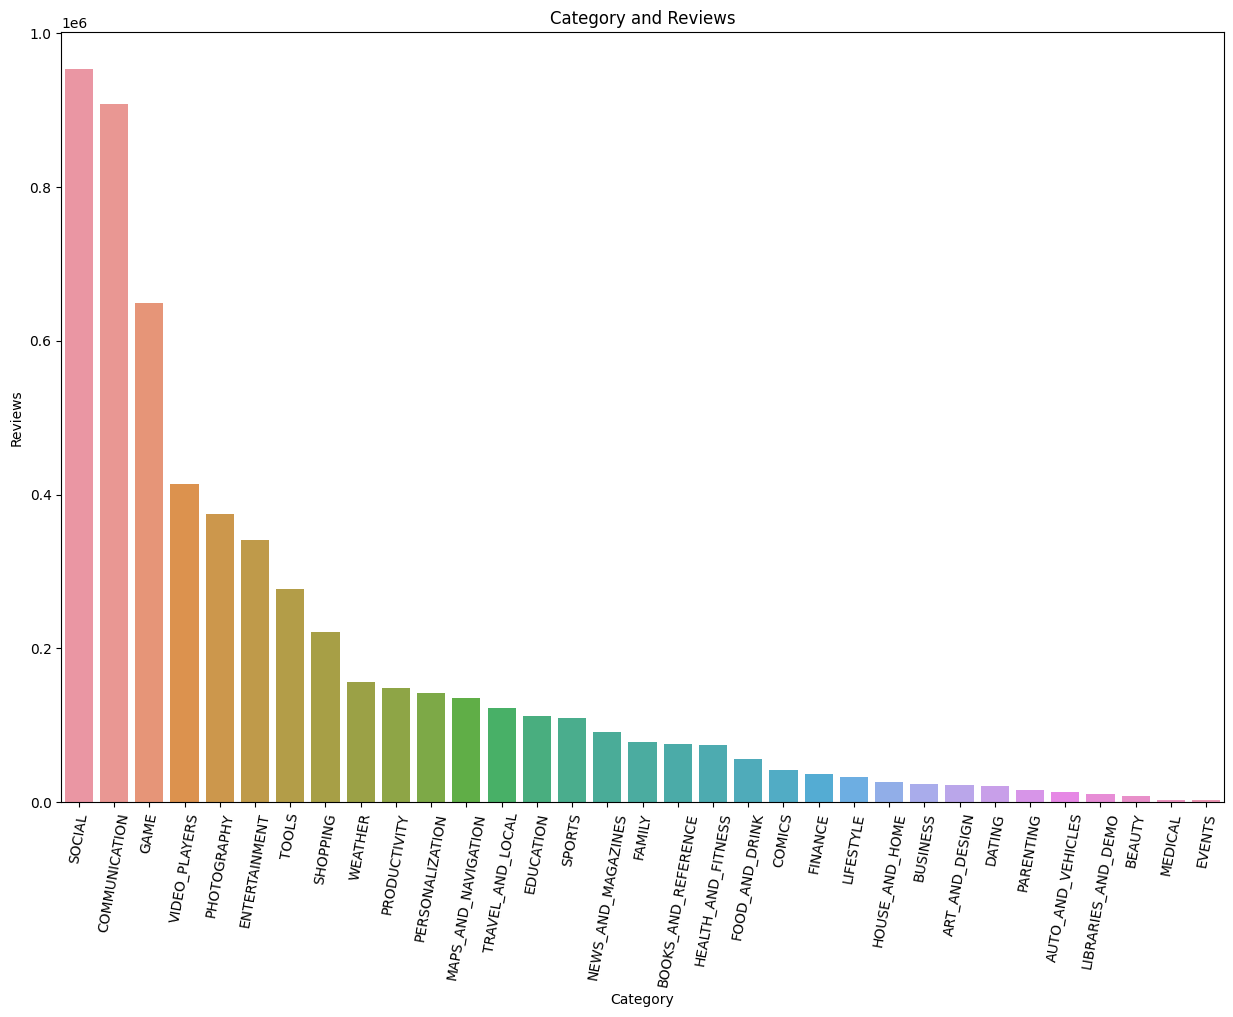

In [58]:
category_list = list(google_unique['Category'].unique())
category_review = []
for i in category_list:
    x = google_unique[google_unique['Category'] == i]
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)
#sorting
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (data_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data =data_category_reviews.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

<a id="e1"></a>
## Category and Installs

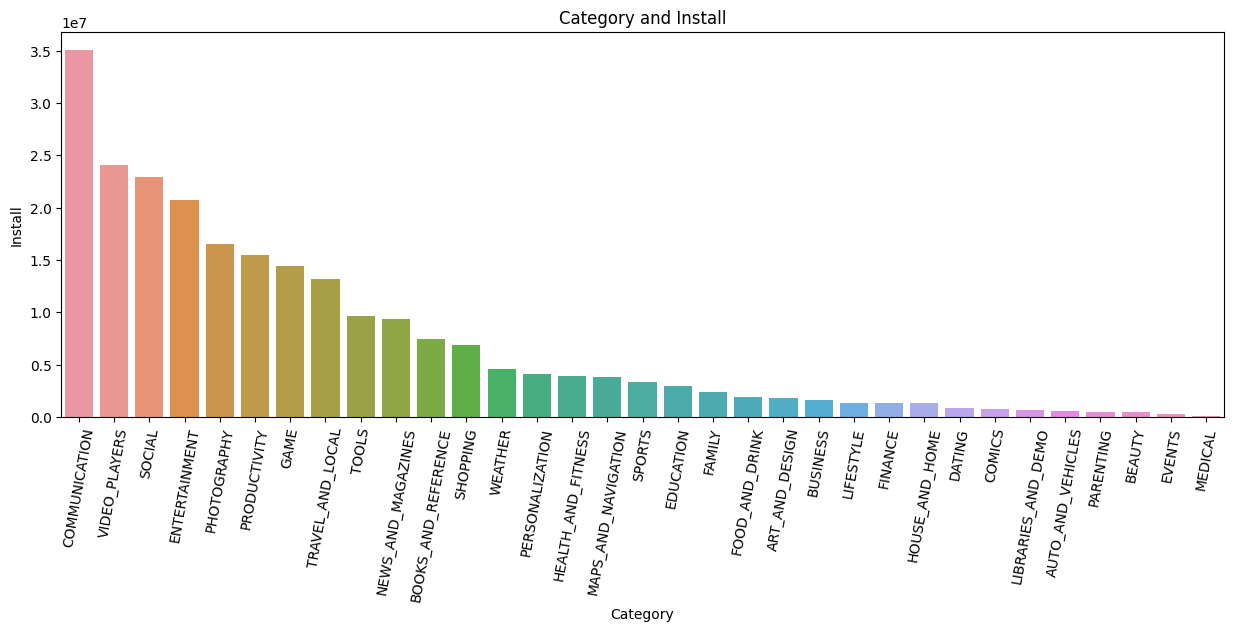

In [59]:
category_list = list(google_unique['Category'].unique())
category_install = []
for i in category_list:
    x = google_unique[google_unique['Category'] == i]
    if(len(x)!=0):
        install = sum(x.Installsx)/len(x)
        category_install.append(install)
    else:
        install = sum(x.Installsx)
        category_install.append(install)
        
#sorting
data_category_install = pd.DataFrame({'category': category_list,'install':category_install})
new_index = (data_category_install['install'].sort_values(ascending=False)).index.values
sorted_data =data_category_install.reindex(new_index)

# visualization
plt.figure(figsize=(15,5))
sns.barplot(x=sorted_data['category'], y=sorted_data['install'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Install")
plt.title("Category and Install")
plt.show()

<a id="f1"> <a/>
## Category and Price -> Revenue for each category

In [60]:
google_unique['Revenue']=google_unique['Price']*google_unique['Installsx']

C:\Users\user\AppData\Local\Temp\ipykernel_8240\612763812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_unique['Revenue']=google_unique['Price']*google_unique['Installsx']


In [115]:
category_and_price = google_unique.groupby("Category").agg({"Revenue": [np.sum, np.mean]})
category_and_price=category_and_price.sort_values(by=[('Revenue', 'mean')],ascending=False)
category_and_price.head(10)

Revenue               
                          sum           mean
Category                                    
LIFESTYLE        5.758394e+07  155632.268649
FINANCE          2.572668e+07   74570.084000
FAMILY           1.136798e+08   62052.317336
WEATHER          4.181380e+06   52928.860759
GAME             4.068864e+07   42428.192753
PHOTOGRAPHY      8.547768e+06   30419.102135
EDUCATION        2.403980e+06   20201.512605
PERSONALIZATION  6.796948e+06   18076.988191
MEDICAL          5.957536e+06   15082.368785
SPORTS           4.706212e+06   14480.652154

In [62]:
category_and_price.columns

MultiIndex([('Revenue',  'sum'),
            ('Revenue', 'mean')],
           )

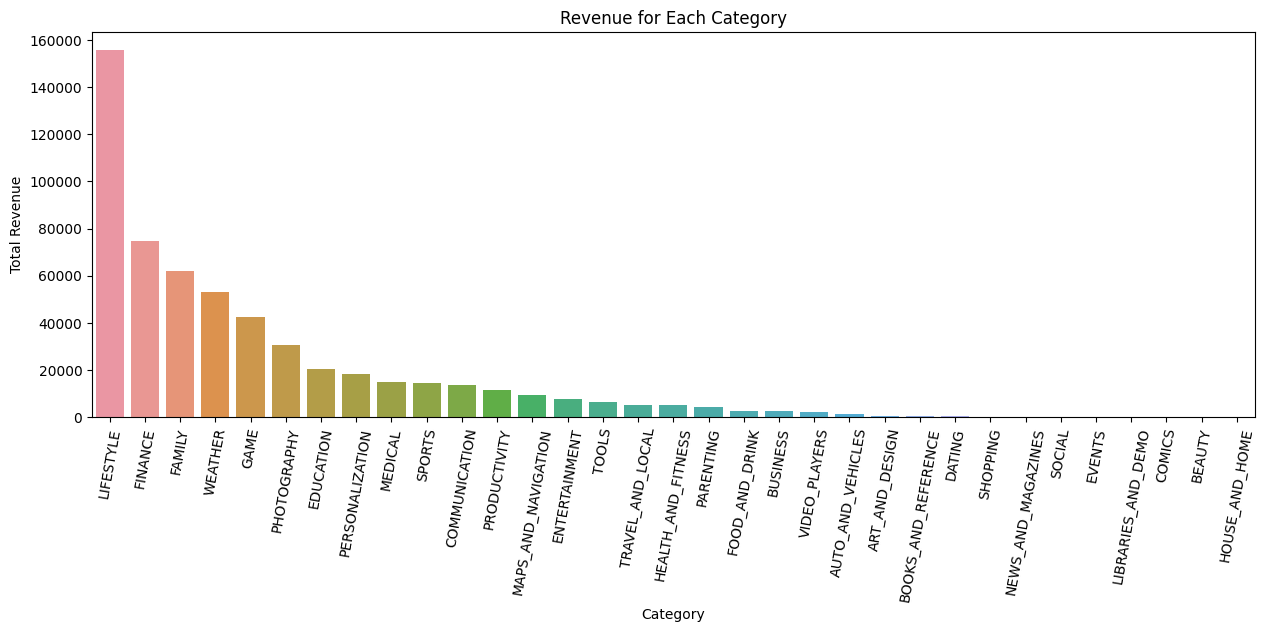

In [116]:
# visualization
plt.figure(figsize=(15,5))
sns.barplot(x=category_and_price.index, y=category_and_price['Revenue','mean'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.title("Revenue for Each Category")
plt.show()

<a id="g1"> <a/>
## Type and Installs

In [64]:
google_installs=google_unique[["Installsx","Type"]]
crosstab_IandM=pd.crosstab(google_installs.Installsx,google_installs.Type)
crosstab_IandM.index=crosstab_IandM.index.astype(int)
crosstab1=crosstab_IandM.sort_index(ascending=False)
crosstab1.head(10)

Type,Free,Paid
Installsx,,
1000000000,20,0
500000000,24,0
100000000,188,0
50000000,202,0
10000000,935,2
5000000,607,0
1000000,1397,20
500000,494,11
100000,1030,82


<a id="h1" > <a/>
##  Word Count in reviews

In [65]:
google_reviews["Translated_Review"].str.split(expand=True).stack().value_counts().head(100)

I          33339
game        6602
like        5021
The         4721
get         4527
           ...  
since        804
version      800
3            793
A            790
No           774
Length: 100, dtype: int64

<a id="i1"> <a/>
##  Mean Sentiment and Level of Average Sentiment Polarity for Each App

I did for each app first, in according to understand a bit, normally this doesn't go anywhere :)

In [66]:
sent=google_reviews[['Sentiment_Polarity','App']]

In [67]:
sent1=sent.dropna().groupby('App').Sentiment_Polarity.mean()

In [68]:
# to dataframe for joining
sent1=sent1.to_frame()

In [69]:
# setting indexes to App, in order to join
google_data1 = google_unique.copy()
google_data1.set_index('App', inplace=True)

In [70]:
google_sent=google_data1.join(sent1,on='App')

In [71]:
# Just to check if it merged correctly

In [72]:
google_sent.head(2)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,index,Installsx,Typex,to_sum,Revenue,Sentiment_Polarity
App,,,,,,,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1,10000.0,0.0,1,0.0,NaN
Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2,500000.0,0.0,1,0.0,0.152652


In [73]:
sent1[sent1.index=="Coloring book moana"]

,Sentiment_Polarity
App,
Coloring book moana,0.152652


In [74]:
#drop na

In [75]:
google_sent1=google_sent.dropna(subset='Sentiment_Polarity')

finding the average sentiment is positive or not

In [76]:
google_sent1['Result_sentiment']=google_sent1.Sentiment_Polarity.apply([lambda x: 'Positive' if x>0 else 'Negative' ])

C:\Users\user\AppData\Local\Temp\ipykernel_8240\2394342012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_sent1['Result_sentiment']=google_sent1.Sentiment_Polarity.apply([lambda x: 'Positive' if x>0 else 'Negative' ])


finding whether the average sentiment polarity is strong or not

In [77]:
google_sent1['Absolute_Sentiment']=google_sent1.Sentiment_Polarity.apply([lambda x: abs(x)])

C:\Users\user\AppData\Local\Temp\ipykernel_8240\3731346253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_sent1['Absolute_Sentiment']=google_sent1.Sentiment_Polarity.apply([lambda x: abs(x)])


In [78]:
google_sent1['Level_of_Sentiment']=google_sent1.Absolute_Sentiment.apply([lambda x: 'Strong' if x>0.59 else 'Not Strong'])

C:\Users\user\AppData\Local\Temp\ipykernel_8240\2654670479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_sent1['Level_of_Sentiment']=google_sent1.Absolute_Sentiment.apply([lambda x: 'Strong' if x>0.59 else 'Not Strong'])


In [79]:
google_sent1

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,Android Ver,index,Installsx,Typex,to_sum,Revenue,Sentiment_Polarity,Result_sentiment,Absolute_Sentiment,Level_of_Sentiment
App,,,,,,,,,,,,,,,,,,,,,
Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,...,4.0.3 and up,2,500000.0,0.0,1,0.0,0.152652,Positive,0.152652,Not Strong
Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33000,"1,000,000+",Free,0.0,Everyone,Art & Design,2017-09-20,...,3.0 and up,9,1000000.0,0.0,1,0.0,0.268483,Positive,0.268483,Not Strong
FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216.0,39000,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-03,...,4.0.3 and up,19,5000000.0,0.0,1,0.0,0.412649,Positive,0.412649,Not Strong
Boys Photo Editor - Six Pack & Men's Suit,ART_AND_DESIGN,4.1,654.0,12000,"100,000+",Free,0.0,Everyone,Art & Design,2018-03-20,...,4.0.3 and up,22,100000.0,0.0,1,0.0,0.283509,Positive,0.283509,Not Strong
Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260.0,25000,"500,000+",Free,0.0,Everyone,Art & Design;Creativity,2017-10-11,...,4.0.3 and up,27,500000.0,0.0,1,0.0,0.171836,Positive,0.171836,Not Strong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"AD - Nieuws, Sport, Regio & Entertainment",NEWS_AND_MAGAZINES,3.7,10369.0,NaN,"1,000,000+",Free,0.0,Everyone,News & Magazines,2018-07-28,...,Varies with device,4946,1000000.0,0.0,1,0.0,0.161824,Positive,0.161824,Not Strong
AppLock,TOOLS,4.4,4931562.0,NaN,"100,000,000+",Free,0.0,Everyone,Tools,2018-06-11,...,Varies with device,5078,100000000.0,0.0,1,0.0,0.016233,Positive,0.016233,Not Strong
Diary with lock password,LIFESTYLE,4.3,179139.0,97000,"5,000,000+",Free,0.0,Everyone,Lifestyle,2017-11-01,...,4.0.3 and up,5394,5000000.0,0.0,1,0.0,0.292267,Positive,0.292267,Not Strong


In [80]:
Strong=google_sent1[google_sent1['Level_of_Sentiment']=='Strong']

In [81]:
Strong.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Google Primer to GPS Speedometer and Odometer
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Category            9 non-null      object        
 1   Rating              9 non-null      float64       
 2   Reviews             9 non-null      float64       
 3   Size                7 non-null      object        
 4   Installs            9 non-null      object        
 5   Type                9 non-null      object        
 6   Price               9 non-null      float64       
 7   Content Rating      9 non-null      object        
 8   Genres              9 non-null      object        
 9   Last Updated        9 non-null      datetime64[ns]
 10  Current Ver         9 non-null      object        
 11  Android Ver         9 non-null      object        
 12  index               9 non-null      int64         
 13  Installsx           

In [82]:
Strong.groupby('Category').size()

Category
BUSINESS               1
EDUCATION              1
HEALTH_AND_FITNESS     2
LIFESTYLE              1
MAPS_AND_NAVIGATION    1
PHOTOGRAPHY            1
PRODUCTIVITY           1
TRAVEL_AND_LOCAL       1
dtype: int64

<a id="j1"> <a/>
## Comparison of two dataframes (Apps and Reviews)

In [83]:
reviewed_apps=list(google_reviews.App.unique())

In [84]:
google_unique.query('App in @reviewed_apps').count()

App               1020
Category          1020
Rating            1020
Reviews           1020
Size               718
Installs          1020
Type              1020
Price             1020
Content Rating    1020
Genres            1020
Last Updated      1020
Current Ver       1020
Android Ver       1020
index             1020
Installsx         1020
Typex             1020
to_sum            1020
Revenue           1020
dtype: int64

In [85]:
google_unique.Reviews.dropna().size

9660

<a id="6"> <a/>
# 6. Joining the Data (Apps and Reviews)

In [86]:
# setting indexes to App, in order to join
google_data2 = google_unique.copy()
google_data2.set_index('App', inplace=True)
google_reviews2 = google_reviews.copy()
google_reviews2.set_index('App', inplace=True)

In [87]:
google_all=google_reviews2.join(google_data2,on='App')

In [88]:
google_all.head(5)

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,...,Content Rating,Genres,Last Updated,Current Ver,Android Ver,index,Installsx,Typex,to_sum,Revenue
App,,,,,,,,,,,,,,,,,,,,,
10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490.0,38000,"500,000+",Free,...,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,1394.0,500000.0,0.0,1.0,0.0
10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490.0,38000,"500,000+",Free,...,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,1394.0,500000.0,0.0,1.0,0.0
10 Best Foods for You,NaN,NaN,NaN,NaN,HEALTH_AND_FITNESS,4.0,2490.0,38000,"500,000+",Free,...,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,1394.0,500000.0,0.0,1.0,0.0
10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490.0,38000,"500,000+",Free,...,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,1394.0,500000.0,0.0,1.0,0.0
10 Best Foods for You,Best idea us,Positive,1.00,0.300000,HEALTH_AND_FITNESS,4.0,2490.0,38000,"500,000+",Free,...,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up,1394.0,500000.0,0.0,1.0,0.0


<a id="7"> <a/>
# 7. Further Analysis

<a id="a2"> <a/>
## Reviews of Paid Apps and Review Word Counts

In [89]:
google_paid=google_all.loc[google_all['Type']=='Paid']

In [90]:
paid_apps=google_paid.sort_values(by='Revenue',ascending=False).index.unique()

In [91]:
paid_apps.size

18

In [92]:
reviews_of_paid=google_paid.query('App in @paid_apps')

In [93]:
reviews_of_paid["Translated_Review"].str.split(expand=True).stack().value_counts().head(50)

I          523
love        84
game        84
like        70
time        62
This        61
The         52
would       51
really      47
app.        45
it.         44
update      42
weather     42
get         41
Review      40
Full        40
It          40
great       40
It's        38
My          38
need        36
I've        35
phone       35
good        35
version     34
make        33
widget      32
even        30
Great       29
Please      29
used        28
I'm         28
using       27
easy        26
old         24
could       23
3           23
want        23
years       23
way         22
cute        22
-           22
still       22
5           21
since       20
best        20
bit         20
anatomy     20
problem     20
2           19
dtype: int64

<a id="d2"> <a/>
## Reviews of Free Apps and Review Word Counts

In [94]:
google_free=google_all.loc[google_all['Type']=='Free']

In [95]:
free_apps=google_free.sort_values(by='Revenue',ascending=False).index.unique()

In [96]:
free_apps.size

1002

In [97]:
reviews_of_free=google_free.query('App in @free_apps')

In [98]:
reviews_of_free["Translated_Review"].str.split(expand=True).stack().value_counts().head(50)

I         32063
game       6412
like       4849
The        4522
get        4408
It         4142
This       3790
good       3148
love       3093
time       3084
would      2862
It's       2566
app.       2527
really     2494
even       2428
I'm        2369
great      2354
can't      2145
it.        2100
play       1892
much       1859
make       1841
many       1780
want       1772
new        1718
I've       1706
need       1619
way        1603
phone      1560
Great      1547
see        1536
every      1525
back       1510
still      1499
ads        1480
easy       1470
work       1457
update     1453
But        1413
using      1408
could      1383
Very       1382
fix        1370
also       1323
game.      1309
go         1293
give       1271
best       1246
5          1246
better     1236
dtype: int64

<a id="e2"> <a/>

## Highest revenued apps detailed analysis

In [99]:
revenue=google_all.sort_values(by='Revenue',ascending=False).head(120)
pd.crosstab(revenue.Category,revenue.Sentiment)

Sentiment,Negative,Neutral,Positive
Category,,,
PERSONALIZATION,5,2,30
SPORTS,3,7,30


In [100]:
revenue.groupby('Revenue').size()

Revenue
1499500.0    40
2490000.0    40
2990000.0    40
dtype: int64

In [101]:
revenue.groupby("Category").agg({'Rating':[np.mean,np.size]})

Rating     
                  mean size
Category                   
FAMILY             4.3   40
PERSONALIZATION    4.2   40
SPORTS             4.1   40

In [102]:
revenue.groupby("Category").agg({'Reviews':[np.mean,np.sum]})

Reviews           
                     mean        sum
Category                            
FAMILY           129603.0  5184120.0
PERSONALIZATION   97890.0  3915600.0
SPORTS             3387.0   135480.0

In [103]:
revenue.groupby("Category").agg({'Installsx':[np.mean,np.sum]})

Installsx            
                      mean         sum
Category                              
FAMILY           1000000.0  40000000.0
PERSONALIZATION  1000000.0  40000000.0
SPORTS             50000.0   2000000.0

In [104]:
revenue

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,...,Content Rating,Genres,Last Updated,Current Ver,Android Ver,index,Installsx,Typex,to_sum,Revenue
App,,,,,,,,,,,,,,,,,,,,,
Card Wars - Adventure Time,NaN,NaN,NaN,NaN,FAMILY,4.3,129603.0,23000,"1,000,000+",Paid,...,Everyone 10+,Card;Action & Adventure,2016-02-11,1.11.0,2.3.3 and up,2243.0,1000000.0,1.0,1.0,2990000.0
Card Wars - Adventure Time,NaN,NaN,NaN,NaN,FAMILY,4.3,129603.0,23000,"1,000,000+",Paid,...,Everyone 10+,Card;Action & Adventure,2016-02-11,1.11.0,2.3.3 and up,2243.0,1000000.0,1.0,1.0,2990000.0
Card Wars - Adventure Time,NaN,NaN,NaN,NaN,FAMILY,4.3,129603.0,23000,"1,000,000+",Paid,...,Everyone 10+,Card;Action & Adventure,2016-02-11,1.11.0,2.3.3 and up,2243.0,1000000.0,1.0,1.0,2990000.0
Card Wars - Adventure Time,NaN,NaN,NaN,NaN,FAMILY,4.3,129603.0,23000,"1,000,000+",Paid,...,Everyone 10+,Card;Action & Adventure,2016-02-11,1.11.0,2.3.3 and up,2243.0,1000000.0,1.0,1.0,2990000.0
Card Wars - Adventure Time,NaN,NaN,NaN,NaN,FAMILY,4.3,129603.0,23000,"1,000,000+",Paid,...,Everyone 10+,Card;Action & Adventure,2016-02-11,1.11.0,2.3.3 and up,2243.0,1000000.0,1.0,1.0,2990000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Golfshot Plus: Golf GPS,I used 5 years. It every course I played acros...,Positive,1.000000,0.300000,SPORTS,4.1,3387.0,25000,"50,000+",Paid,...,Everyone,Sports,2018-07-11,4.18.0,4.1 and up,3040.0,50000.0,1.0,1.0,1499500.0
Golfshot Plus: Golf GPS,Having problems accuracy yardages. Was working...,Neutral,0.000000,0.000000,SPORTS,4.1,3387.0,25000,"50,000+",Paid,...,Everyone,Sports,2018-07-11,4.18.0,4.1 and up,3040.0,50000.0,1.0,1.0,1499500.0
Golfshot Plus: Golf GPS,Coming using iPhone version last couple years ...,Negative,-0.095833,0.420833,SPORTS,4.1,3387.0,25000,"50,000+",Paid,...,Everyone,Sports,2018-07-11,4.18.0,4.1 and up,3040.0,50000.0,1.0,1.0,1499500.0


In [105]:
# Sentiment and Type
pd.crosstab(google_all.Type,google_all.Sentiment)

Sentiment,Negative,Neutral,Positive
Type,,,
Free,7942,4828,22748
Paid,63,28,325


In [106]:
# Sentiment and 
google_all.groupby('Sentiment').agg({'Rating':[np.mean,np.size]})

Rating       
               mean   size
Sentiment                 
Negative   4.268195   8271
Neutral    4.222920   5163
Positive   4.322897  23998

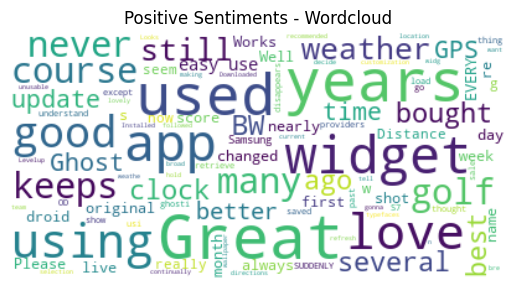

In [107]:
# word cloud for negatives 
import wordcloud 

 
# Wordcloud with positive sentiments
positive_sentiments =str( revenue['Translated_Review'][revenue["Sentiment"] == 'Positive'].reset_index(drop=True))
stop_words = list(wordcloud.STOPWORDS)
positive_wordcloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(positive_sentiments)
plt.figure()
plt.title("Positive Sentiments - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [108]:
from PIL import Image
positive_mask = np.array(Image.open("img/plus.png"))
negative_mask = np.array(Image.open("img/minus.png"))
neutral_mask = np.array(Image.open("img/neutral.png"))

In [119]:

def map_to_array(image):
    img = Image.open(image)
    img = img.convert(mode="1", dither=Image.NONE)
    array = np.array(img, dtype=np.uint8)
    print(array)
    return array

In [120]:
positive_array=map_to_array("img/plus.png")
negative_array=map_to_array("img/minus.png")
neutral_array=map_to_array("img/neutral.png")

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [121]:
def transform_format(val):
    if val == 1:
        return 255
    elif val==0:
        return 1
    else:
        return val

In [122]:
# Transform your mask into a new one that will work with the function:
transformed_positive = np.ndarray((positive_array.shape[0],positive_array.shape[1]), np.int32)

for i in range(len(positive_array)):
    transformed_positive[i] = list(map(transform_format, positive_array[i]))

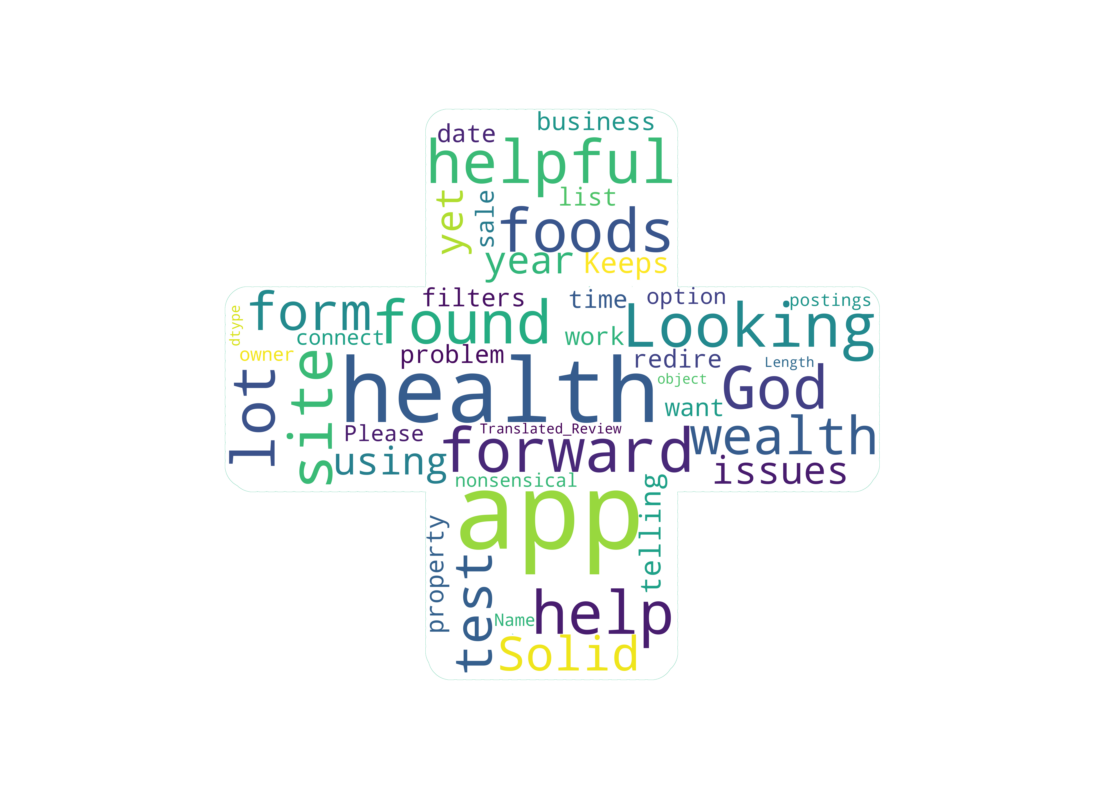

In [ ]:
# Create a word cloud image
wc = wordcloud.WordCloud(background_color="white", mask=transformed_positive,
               stopwords=stop_words, contour_width=1, contour_color='mediumaquamarine')

# Generate a wordcloud
wc.generate(positive_sentiments)

# store to file
wc.to_file("img/positive_.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

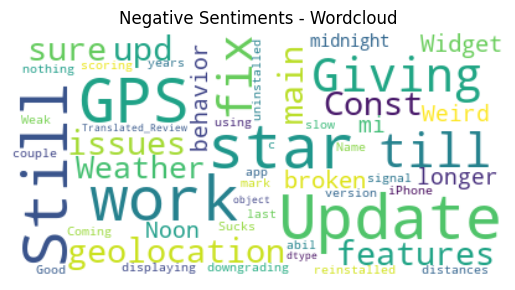

In [ ]:
# Wordcloud with negative sentiments
negative_sentiments =str( revenue['Translated_Review'][revenue["Sentiment"] == 'Negative'].reset_index(drop=True))
stop_words = list(wordcloud.STOPWORDS)
negative_wordcloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(negative_sentiments)
plt.figure()
plt.title("Negative Sentiments - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Transform your mask into a new one that will work with the function:
transformed_negative = np.ndarray((negative_array.shape[0],negative_array.shape[1]), np.int32)

for i in range(len(negative_array)):
    transformed_negative[i] = list(map(transform_format, negative_array[i]))

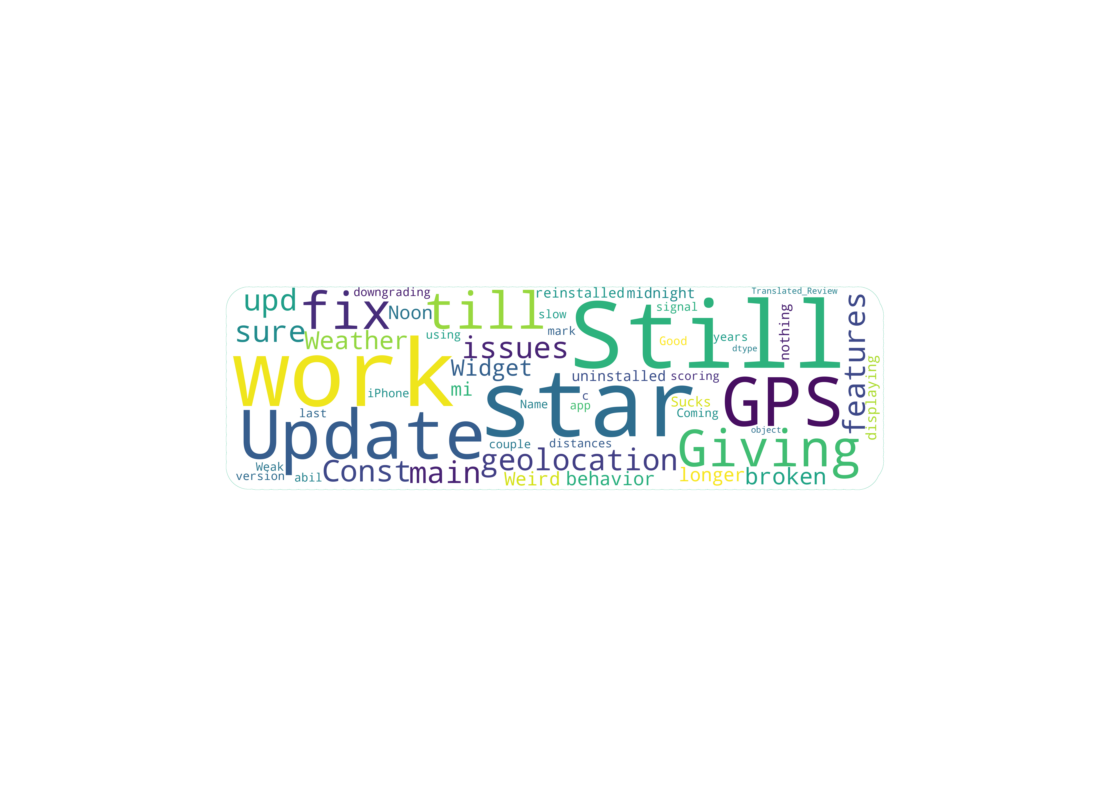

In [ ]:
# Create a word cloud image
wc = wordcloud.WordCloud(background_color="white", mask=transformed_negative,
               stopwords=stop_words, contour_width=1, contour_color='mediumaquamarine')

# Generate a wordcloud
wc.generate(negative_sentiments)

# store to file
wc.to_file("img/negative_.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

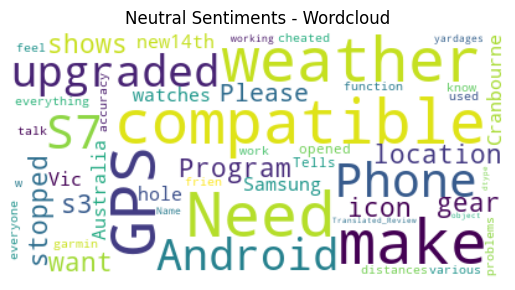

In [ ]:
# Wordcloud with neutral sentiments
neutral_sentiments =str( revenue['Translated_Review'][revenue["Sentiment"] == 'Neutral'].reset_index(drop=True))
stop_words = list(wordcloud.STOPWORDS)
neutral_wordcloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(neutral_sentiments)
plt.figure()
plt.title("Neutral Sentiments - Wordcloud")
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Transform your mask into a new one that will work with the function:
transformed_neutral = np.ndarray((neutral_array.shape[0],neutral_array.shape[1]), np.int32)

for i in range(len(neutral_array)):
    transformed_neutral[i] = list(map(transform_format, neutral_array[i]))

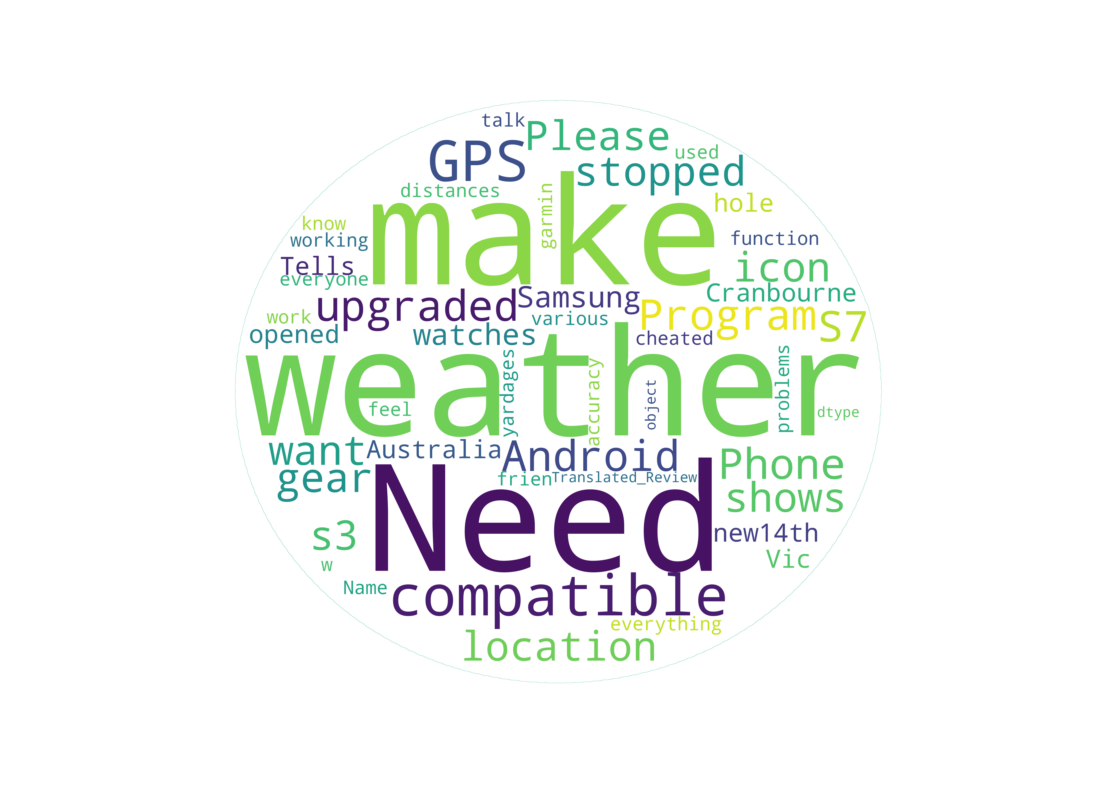

In [ ]:
# Create a word cloud image
wc = wordcloud.WordCloud(background_color="white", mask=transformed_neutral,
               stopwords=stop_words, contour_width=1, contour_color='mediumaquamarine')

# Generate a wordcloud
wc.generate(neutral_sentiments)

# store to file
wc.to_file("img/neutral_.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
str( revenue['Translated_Review'][revenue["Sentiment"] == 'Positive'].reset_index(drop=True))


'0     This first I used OD (original droid)! And usi...\n1     I love app, I still understand years using it,...\n2     Great App. I thought changed weather providers...\n3     Lives name I bought several years ago sale. I ...\n4     S7 I love bw used years. SUDDENLY keeps ghosti...\n5     Great widget except thing I never load saved w...\n6     The clock widget disappears I go retrieve show...\n7     I\'ve used years. The past week continually bre...\n8     Love customization! I love making clock/weathe...\n9     After nearly 3 years nearly unusable, I decide...\n10    Installed followed directions. Downloaded widg...\n11    Looks great I love wallpaper, however I live n...\n12    It\'s lovely widget app. But I\'m gonna hold 2 s...\n13    Levelup team, weather current location refresh...\n14    Not recommended want broad selection typefaces...\n15    (GS-7) Please tell changed. stopped working re...\n16    Works decently. I never give glowing reviews a...\n17    UNLOCK WEATHER ANIMAT

In [ ]:
revenue_positive=revenue['Translated_Review'][revenue["Sentiment"] == 'Positive']
revenue_positive=revenue_positive.str.split(expand=True).stack().value_counts()
revenue_positive.to_csv('revenue_positive.csv',index=False )

<a id="b2"> <a/>
## Highest Revenued App Categories and Review Word Counts

In [ ]:
google_paid=google_all.loc[google_all['Type']=='Paid']

In [ ]:
Finance_paid=google_paid.loc[google_paid["Category"]=='FINANCE']
Family_paid=google_paid.loc[google_paid["Category"]=='FAMILY']
Lifestyle_paid=google_paid.loc[google_paid["Category"]=='LIFESTYLE']
Medical_paid=google_paid.loc[google_paid["Category"]=='MEDICAL']

In [ ]:
Medical_paid_words=Medical_paid["Translated_Review"].str.split(expand=True).stack().value_counts().head(50)
Family_paid_words=Family_paid["Translated_Review"].str.split(expand=True).stack().value_counts().head(50)
Lifestyle_paid_words=Lifestyle_paid["Translated_Review"].str.split(expand=True).stack().value_counts().head(50)
Finance_paid_words=Finance_paid["Translated_Review"].str.split(expand=True).stack().value_counts().head(50)

In [ ]:
Medical_paid_words=Medical_paid_words.to_frame()
Family_paid_words=Family_paid_words.to_frame()
Lifestyle_paid_words=Lifestyle_paid_words.to_frame()
Finance_paid_words=Finance_paid_words.to_frame()

In [ ]:
Medical_paid_words=Medical_paid_words.loc[Medical_paid_words.index!='I']
Finance_paid_words=Finance_paid_words.loc[Finance_paid_words.index!='I']
Lifestyle_paid_words=Lifestyle_paid_words.loc[Lifestyle_paid_words.index!='I']
Family_paid_words=Family_paid_words.loc[Family_paid_words.index!='I']

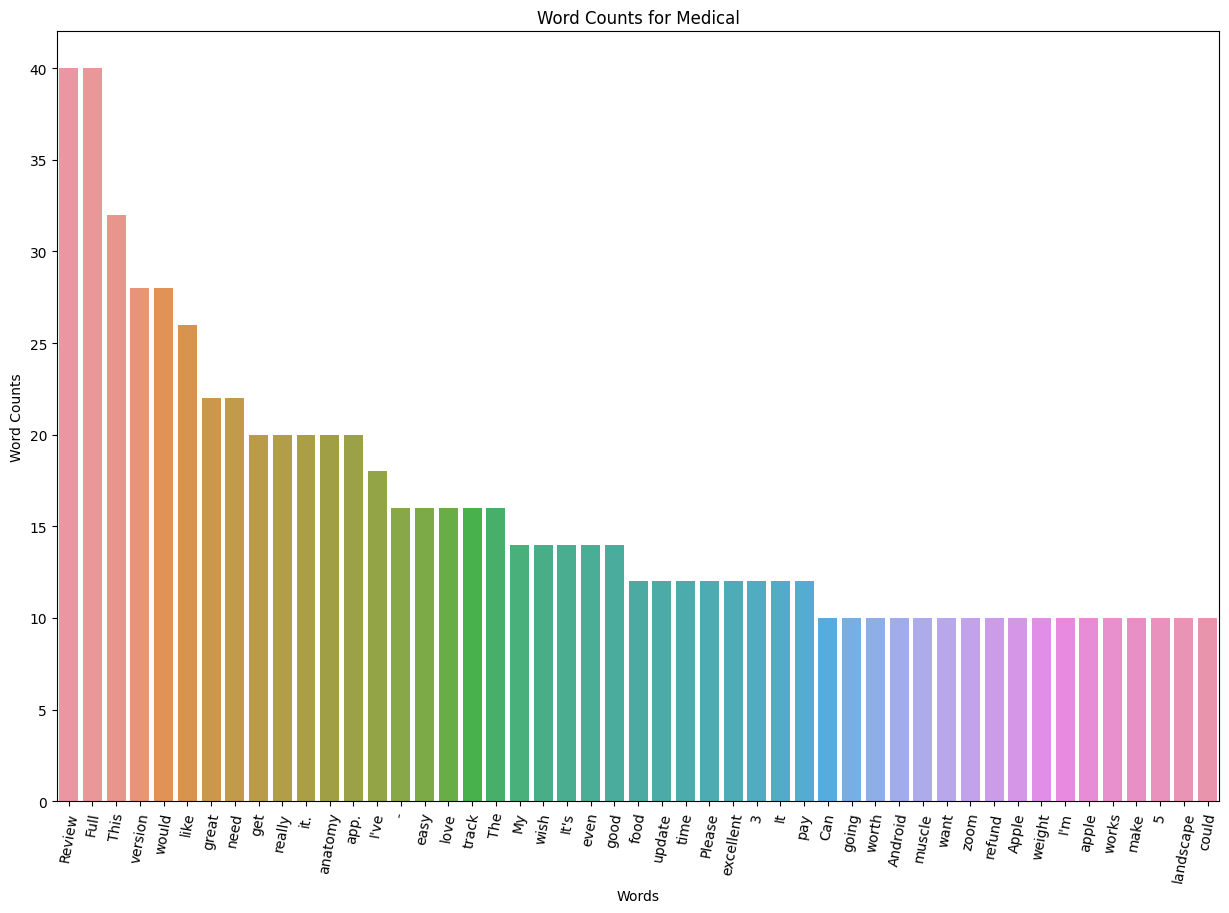

In [ ]:
# visualization Medical
plt.figure(figsize=(15,10))
sns.barplot(x=Medical_paid_words.index, y=Medical_paid_words[0])
plt.xticks(rotation=80)
plt.xlabel("Words")
plt.ylabel("Word Counts")
plt.title("Word Counts for Medical")
plt.show()

In [ ]:
Finance_paid_words

,0


In [ ]:
Lifestyle_paid_words

,0


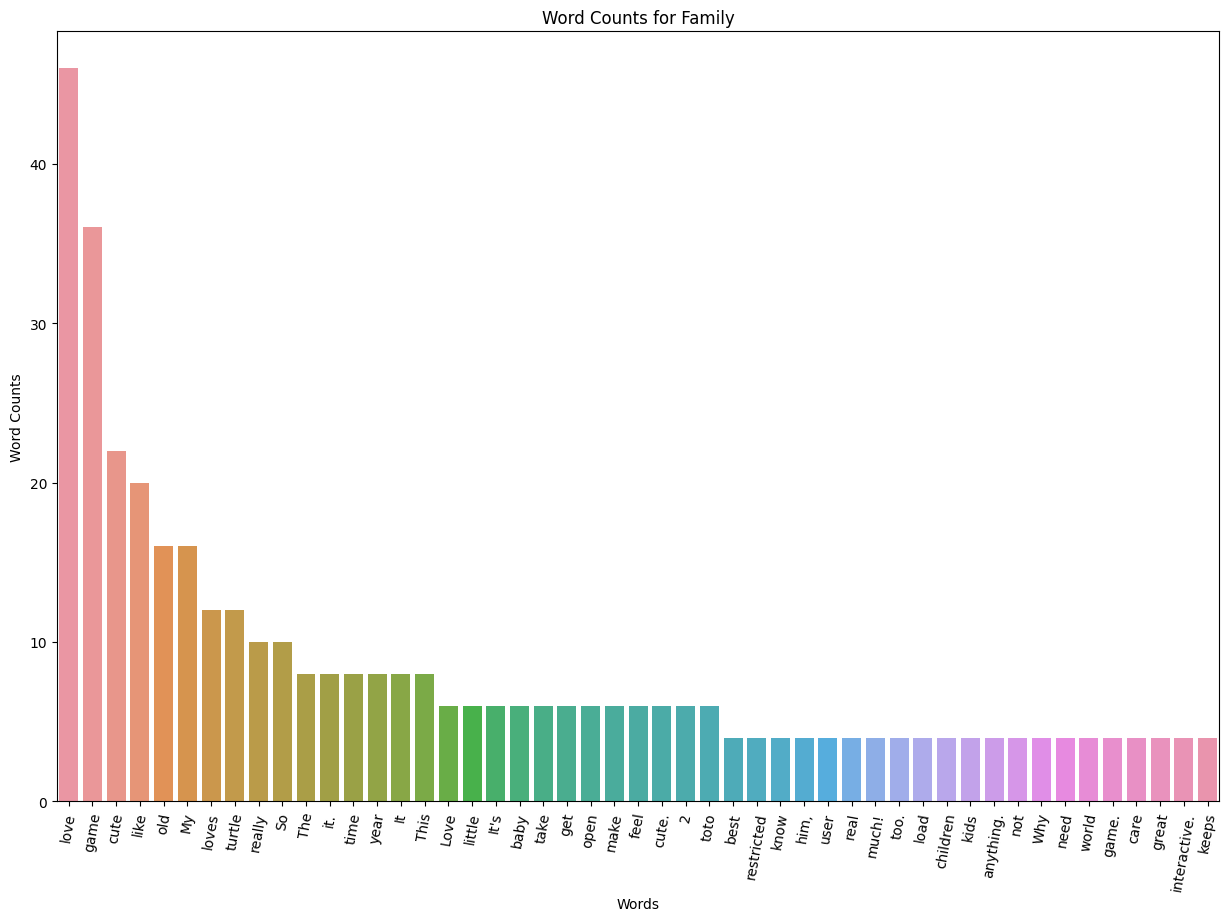

In [ ]:
# visualization Family
plt.figure(figsize=(15,10))
sns.barplot(x=Family_paid_words.index, y=Family_paid_words[0])
plt.xticks(rotation=80)
plt.xlabel("Words")
plt.ylabel("Word Counts")
plt.title("Word Counts for Family")
plt.show()

In [ ]:
# -----------------

In [ ]:
google_polarity=google_all.dropna(subset='Sentiment_Polarity')
google_subjectivity=google_all.dropna(subset='Sentiment_Subjectivity')

In [ ]:
pol=google_polarity.groupby('App').agg({'Sentiment_Polarity':[np.sum,np.mean]})

In [ ]:
sub=google_subjectivity.groupby('App').agg({'Sentiment_Subjectivity':[np.sum,np.mean]})

In [ ]:
rate=google_unique.dropna(subset='Rating')
rate=rate.groupby('App').agg({'Rating':[np.sum,np.mean]})

In [ ]:
rate

Rating     
                                                    sum mean
App                                                         
+Download 4 Instagram Twitter                       4.5  4.5
- Free Comics - Comic Apps                          3.5  3.5
.R                                                  4.5  4.5
/u/app                                              4.7  4.7
058.ba                                              4.4  4.4
...                                                 ...  ...
감성학원 BL 첫사랑                                         4.4  4.4
💎 I'm rich                                          3.8  3.8
💘 WhatsLov: Smileys of love, stickers and GIF       4.6  4.6
📏 Smart Ruler ↔️ cm/inch measuring for homework!    4.0  4.0
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    4.7  4.7

[8197 rows x 2 columns]

In [ ]:
result=pol.join(sub,on='App').join(rate,on='App')                           

<a id="c2"> <a/>
## Most Successfull apps, types and categories

I think that rating, polarity and subjectivity is parameters. 

In [ ]:
result['Result']=result[('Rating','mean')]*result[('Sentiment_Polarity','mean')]/result[('Sentiment_Subjectivity','mean')] 

In [ ]:
result=result.sort_values(by='Result', ascending=False)

In [ ]:
result=result.loc[result['Result']!=np.inf].head(10)

In [ ]:
top10=list(result.index)

In [ ]:
top10_=google_unique.query('App in @top10')

In [ ]:
top10_

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,index,Installsx,Typex,to_sum,Revenue
198,Google Primer,BUSINESS,4.4,62272.0,18000,"10,000,000+",Free,0.0,Everyone,Business,2018-06-26,3.550.2,4.1 and up,199,10000000.0,0.0,1,0.0
812,HomeWork,EDUCATION,4.3,16195.0,52000,"1,000,000+",Free,0.0,Everyone,Education,2016-09-20,8.5.2,4.0 and up,813,1000000.0,0.0,1,0.0
1268,Home Workout for Men - Bodybuilding,HEALTH_AND_FITNESS,4.8,12705.0,15000,"1,000,000+",Free,0.0,Everyone,Health & Fitness,2018-07-10,1.0.2,4.0 and up,1269,1000000.0,0.0,1,0.0
1353,Best Ovulation Tracker Fertility Calendar App ...,HEALTH_AND_FITNESS,4.6,56145.0,23000,"1,000,000+",Free,0.0,Everyone,Health & Fitness,2018-08-01,7.3.4-play,5.0 and up,1354,1000000.0,0.0,1,0.0
1492,Apartment Decorating Ideas,HOUSE_AND_HOME,3.9,1478.0,57000,"100,000+",Free,0.0,Everyone,House & Home,2015-03-13,1.2,3.0 and up,1493,100000.0,0.0,1,0.0
1646,Bed Time Fan - White Noise Sleep Sounds,LIFESTYLE,4.5,10097.0,75000,"500,000+",Free,0.0,Everyone,Lifestyle,2018-04-26,1.2,4.0 and up,1647,500000.0,0.0,1,0.0
2892,Cameringo Lite. Filters Camera,PHOTOGRAPHY,4.2,140917.0,57000,"10,000,000+",Free,0.0,Everyone,Photography,2018-06-11,2.2.93,4.0 and up,2893,10000000.0,0.0,1,0.0
2987,"All Football GO- Live Score, Games",SPORTS,4.6,1981.0,10000,"100,000+",Free,0.0,Everyone,Sports,2018-06-21,2.9.9go,4.1 and up,2988,100000.0,0.0,1,0.0
3356,3D Live Neon Weed Launcher,PERSONALIZATION,4.5,1724.0,21000,"100,000+",Free,0.0,Mature 17+,Personalization,2018-06-26,5.34.10,4.0.3 and up,3357,100000.0,0.0,1,0.0
3848,GPS Speedometer and Odometer,MAPS_AND_NAVIGATION,4.8,15865.0,33000,"1,000,000+",Free,0.0,Everyone,Maps & Navigation,2018-08-03,10.0,4.1 and up,3849,1000000.0,0.0,1,0.0


In [ ]:
# Average Sentiment and Category
google_sent1['Result_']=google_sent1.Result_sentiment.apply([lambda x: 1 if x=='Positive' else 0])
google_sent1.groupby('Category').agg({'Result_':[np.sum,np.size]})


C:\Users\user\AppData\Local\Temp\ipykernel_9424\3695130289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_sent1['Result_']=google_sent1.Result_sentiment.apply([lambda x: 1 if x=='Positive' else 0])


Result_     
                        sum size
Category                        
ART_AND_DESIGN           10   10
AUTO_AND_VEHICLES         7    8
BEAUTY                    5    6
BOOKS_AND_REFERENCE      16   16
BUSINESS                 17   20
COMICS                    2    2
COMMUNICATION            31   32
DATING                   29   33
EDUCATION                21   22
ENTERTAINMENT            23   25
EVENTS                    5    5
FAMILY                   48   53
FINANCE                  35   39
FOOD_AND_DRINK           18   18
GAME                     70   93
HEALTH_AND_FITNESS       40   40
HOUSE_AND_HOME           13   15
LIBRARIES_AND_DEMO        9    9
LIFESTYLE                22   23
MAPS_AND_NAVIGATION       7    7
MEDICAL                  29   33
NEWS_AND_MAGAZINES       21   24
PARENTING                 8    8
PERSONALIZATION          34   34
PHOTOGRAPHY              29   31
PRODUCTIVITY             36   37
SHOPPING                 19   20
SOCIAL                   14   18
SPORTS                   28   31
TOOLS                    43   47
TRAVEL_AND_LOCAL         37   42
VIDEO_PLAYERS             8    9
WEATHER                   6    6

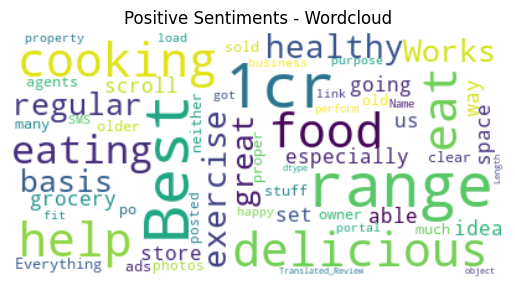

In [ ]:
# word cloud for negatives 
import wordcloud 

 
# Wordcloud with positive sentiments
positive_sentiments = str(google_all['Translated_Review'][google_all["Sentiment"] == 'Positive'].reset_index(drop=True))
stop_words = list(wordcloud.STOPWORDS)
positive_wordcloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_sentiments))
plt.figure()
plt.title("Positive Sentiments - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
positive_sentiments = google_all['Translated_Review'][google_all["Sentiment"] == 'Positive']
positive_sentiments.str.split(expand=True).stack().value_counts().head(50)

I         22489
like       3529
game       3485
The        3119
good       3090
love       2962
It         2868
get        2835
This       2626
great      2312
would      2274
time       2043
really     2024
app.       1980
It's       1951
I'm        1623
much       1549
many       1533
Great      1529
it.        1509
easy       1470
even       1442
make       1333
new        1326
I've       1278
best       1265
way        1217
can't      1212
want       1200
need       1172
better     1141
Very       1130
But        1100
play       1087
see        1084
Good       1075
could      1072
using      1066
also       1058
able       1052
free       1048
Love       1047
phone      1009
still       970
update      951
ads         950
every       942
work        941
back        932
nice        927
dtype: int64

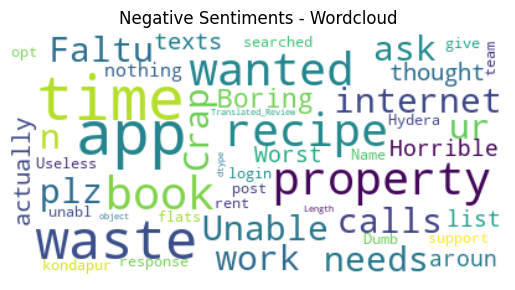

In [ ]:
# Wordcloud with negative sentiments
positive_sentiments = str(google_all['Translated_Review'][google_all["Sentiment"] == 'Negative'].reset_index(drop=True))
stop_words = ["https", "co", "RT"] + list(wordcloud.STOPWORDS)
positive_wordcloud = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_sentiments))
plt.figure()
plt.title("Negative Sentiments - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


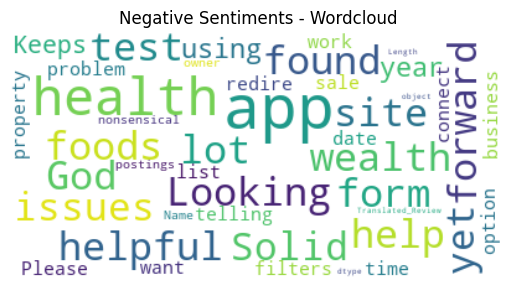

In [ ]:
# Wordcloud with neutral sentiments
positive_sentiments = str(google_all['Translated_Review'][google_all["Sentiment"] == 'Neutral'].reset_index(drop=True))
stop_words = list(wordcloud.STOPWORDS)
positive_wordcloud = wordcloud.WordCloud(max_font_size=50, background_color="white", stopwords = stop_words).generate(positive_sentiments)
plt.figure()
plt.title("Negative Sentiments - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
google_all['Translated_Review'][google_all["Sentiment"] == 'Neutral']

App
10 Best Foods for You                                          Looking forward app,
10 Best Foods for You                         It helpful site ! It help foods get !
10 Best Foods for You                                                    God health
10 Best Foods for You                             I found lot wealth form health...
10 Best Foods for You                                                   On test....
                                                        ...                        
Hotwire Hotel & Car Rental App           Solid app. No issues yet. Been using year.
Hotwire Hotel & Car Rental App    Keeps telling there's problem date time, can't...
Housing-Real Estate & Property    Why business? Your filters don't work.. redire...
Housing-Real Estate & Property     I want list property sale option. Please connect
Housing-Real Estate & Property    What nonsensical app.. doesn't owner postings ...
Name: Translated_Review, Length: 5163, dtype: object